# Analysing Student Feedback Using Machine Learning

## Importing necessary libraries.

In [1]:

import warnings
warnings.filterwarnings('ignore')#avoid warnings for clean output

import numpy as np #Importing the necessary numeric data packages and data analysis packages
import pandas as pd
pd.set_option('display.max_rows', 999)

## Loading Data

We will start by loading the data into a dataframe. The read_csv function reads a .csv file and loads it into a data frame which enables us to easily manipulate and use the data. 

In [2]:
train_file_path = "feedback dataset.csv"
train_data = pd.read_csv(train_file_path)

We will train our model using the student reviews dataset. This dataset contains 5200 Reviews and a sentiment column which denotes whether the review is positive or negative.

This is how our dataframe looks like.

In [8]:
train_data.head()#shows the first 5 rows of our dataset

,text,sentiment
0,Display is excellent and camera is as good as ...,1
1,Battery life is also great!,1
2,Protects the phone on all sides.,1
3,"Clear Skype Calls, Long Battery Life, Long Range.",1
4,Great Hands Free Device.,1


In [4]:
print("Total number of Reviews in train set = {}".format(train_data.shape[0]))# printing the total number of reviews in our data set

Total number of Reviews in train set = 5200


In [5]:
train_data=train_data.dropna()# dropping the null value rows

In [6]:
train_data.sentiment = train_data.sentiment.apply(lambda x: int(x == 1)) #Assaigning the 1 to the left out reviews

In [7]:
print("Total number of positive and negative tweets are as follow:")
train_data.sentiment.value_counts()# out put the number of different reviews in our data set

Total number of positive and negative tweets are as follow:


0    2600
1    2600
Name: sentiment, dtype: int64

This is a balanced dataset. This means that the number of negative reviews is equal to the number of positive reviews. This will ensure that our model is not biased.

## Processing data

Machine Learning algorithms do not deal with text, and therefore we will have to process this before we start training our model. We will start by importing all the necessary libraries to process text.

In [9]:
import re #Regural expression module
import nltk #Natural language toolkit
from nltk.corpus import stopwords #corpus is large and structured set of text
from string import punctuation #loading set of punctuations from string library
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords') #we can download and print the stopwords if needed
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\P.Lenin naga
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\P.Lenin naga
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

We will start by removing punctuations and emojis. Then we will remove any non-ASCII characters and other special charecters because these do not alter the sentiment of the review.

In [10]:
stop_words = set(list(punctuation)) #storing list list of punctuation marks in the variable
def process_text(text): # A fuction that returns the pre-processed data
    text = text.lower() # converts all the data to lower case letters
    text = re.sub(r'[^\x00-\x7F]+',' ', text) # It replaces the non-Ascii characters with the spaces
    text = re.sub('@[^\s]+', ' ', text) # replace any white-spaces characters with space
    text = re.sub(r'#([^\s]+)', ' ', text)
    text = word_tokenize(text) #extracts the tokens from string of characters
    text = [word for word in text if word not in stop_words] #removes all the punctuation marks from the list and store data in text variable
    return text

In [11]:
max_vocab_size = 5000 #we assaign 5000 as the maximum vocabulary size
max_words = 50 # This assaign the max length of the each review we should consider is 50

In [12]:
train_data['text'] = train_data['text'].apply(process_text) #Here we apply the process_text function to the all train_data to get preprocessed and ready for the training

This is how our modified data frame looks like with the processed texts.

In [13]:
train_data.head() #This is how the data looks after applying some of the preprocessing techniques

,text,sentiment
0,"[display, is, excellent, and, camera, is, as, ...",1
1,"[battery, life, is, also, great]",1
2,"[protects, the, phone, on, all, sides]",1
3,"[clear, skype, calls, long, battery, life, lon...",1
4,"[great, hands, free, device]",1


Now the text has been cleaned its time to convert them into tokens through this process called tokenization. Tokenization is the process of replacing thext with unique numbers. Since our model won't be able to understand the text. This process converts our text into an array of sequences which can be read by our model.
We use the Keras' tokenzier fucntion to do this for us. Then we get a sequence of tokens. 

Then inorder to make sure that all our sequences are of same length we pad these sequnece with zeroes.

In [14]:
tokenizer = Tokenizer(num_words=max_vocab_size) #max words in the dictonary we create
tokenizer.fit_on_texts(train_data['text']) #tokenizer will assign numbers to words
sequences = tokenizer.texts_to_sequences(train_data['text']) #change list with words into the list with numbers
padded_sequences = pad_sequences(sequences, maxlen=max_words, padding='post',) #all other remaining blocks will be assigned zero

In [15]:
padded_sequences # this is how our totally preprocessed data looks like 

array([[2006,    3,   43, ...,    0,    0,    0],
       [ 202,  235,    3, ...,    0,    0,    0],
       [3240,    1,   60, ...,    0,    0,    0],
       ...,
       [2003,    0,    0, ...,    0,    0,    0],
       [ 102,    0,    0, ...,    0,    0,    0],
       [  43,   18,  247, ...,    0,    0,    0]])

## Splitting the data

We split the dataframe into train and test set. Intuitively, we will use the train set to train our Model and our test set to test the performance of our model.

In [16]:
from sklearn.model_selection import train_test_split # The sklearn library has the many machine learning and stastical models we loaded tarin_test_split
xtrain, xtest, ytrain, ytest = train_test_split(padded_sequences, train_data.sentiment, test_size=0.33, random_state=42, shuffle = True) #This funcion splits the train data and test data 
print('The number of elements in Train Set = {}'.format(len(xtrain)))#the two lines of code prints number of elements in test set and train set
print('The number of elements in Test Set = {}'.format(len(xtest)))
methodnames = []
methodscores = []
methodprecision=[]
methodrecall=[]
methodf1=[]

The number of elements in Train Set = 3484
The number of elements in Test Set = 1716


# Gaussian Naive bayes Algorithm

Accuracy: 0.512238
Precision: 0.552941
Recall: 0.163194
F1 score: 0.252011


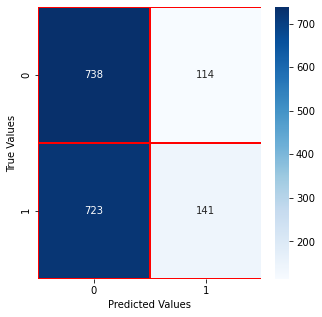

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score# importing the error metrices from sklearn library
from sklearn.naive_bayes import GaussianNB#importing the Gaussian Naive bayes algorithm 
import seaborn as sns#importing seaborn library for graphics
%matplotlib inline 
from matplotlib import pyplot as ply
gnb = GaussianNB()#loading the algorithm in the gnb variable
gnb.fit(xtrain, ytrain)#fitting is training the model with the train data set
methodnames.append("GNB")
methodscores.append(gnb.score(xtest,ytest))

f=gnb.predict(xtest)# predict the labels of the data values on the basis of the trained model and stores in the variable
accuracy = accuracy_score(ytest, f) #the accuracy of the model is stored in variable
print('Accuracy: %f' % accuracy)#printing the accuracy of our trained model
precision = precision_score(ytest, f) #the accuracy of the model is found
print('Precision: %f' % precision)#printing the precision of our trained model
recall = recall_score(ytest, f) #The recall score of the model is find
print('Recall: %f' % recall)#printing the Recall of our trained model
f1 = f1_score(ytest, f) #The f1_score of the model is find
print('F1 score: %f' % f1)#printing the f1_score of our trained model
methodprecision.append(precision)#appending the varaible names to the metrices in the following 3 lines
methodrecall.append(recall)
methodf1.append(f1)
from sklearn.metrics import confusion_matrix #importing the confusion matrix from sklearn
cm = confusion_matrix(ytest,f)#loading the confusion matrix to the varaible
f,ax = ply.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax,cmap="Blues")#printing the confusion matrix using heatmaps

ply.savefig('DTConfusionMatrix.png')#saving the matrix figure
ply.xlabel("Predicted Values")#assaigning the x-axis and y-axis labels
ply.ylabel("True Values")
ply.show()#This displays the confusion matrix figure


# Decision Tree classifier

In the below block we use the Decision tree classifier algorithm for training and finding the error metrices for our model all the code is similar to the above gaussian naive bayes classifer.
For the description of the code snippets you can refer to the gaussian naive bayes code block

Accuracy: 0.782634
Precision: 0.811944
Recall: 0.739583
F1 score: 0.774076


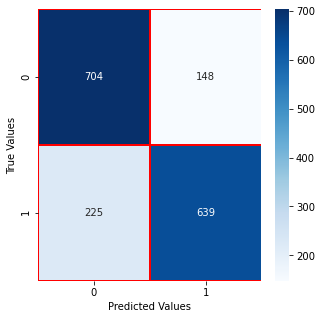

In [19]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score
dectree = DecisionTreeClassifier()
dectree.fit(xtrain,ytrain)
methodnames.append("DT")
methodscores.append(dectree.score(xtest,ytest))

f=dectree.predict(xtest)
accuracy = accuracy_score(ytest, f)
print('Accuracy: %f' % accuracy)
precision = precision_score(ytest, f)
print('Precision: %f' % precision)
recall = recall_score(ytest, f)
print('Recall: %f' % recall)
f1 = f1_score(ytest, f)
print('F1 score: %f' % f1)
methodprecision.append(precision)
methodrecall.append(recall)
methodf1.append(f1)
cm = confusion_matrix(ytest,f)
f,ax = ply.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',cmap="Blues",ax=ax)

ply.savefig('DTConfusionMatrix.png')
ply.xlabel("Predicted Values")
ply.ylabel("True Values")
ply.show()

# Random Forest Classifier

In the below block we use the random forest algorithm for training and finding the error metrices for our model all the code is similar to the above gaussian naive bayes classifer.
For the description of the code snippets you can refer to the gaussian naive bayes code block

Accuracy: 0.801282
Precision: 0.877345
Recall: 0.703704
F1 score: 0.780989


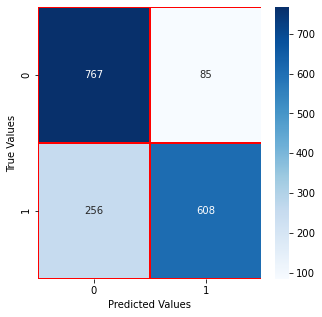

In [21]:

from sklearn.ensemble import RandomForestClassifier #importing the Random forest algorithm 
randforest = RandomForestClassifier(n_estimators=100, random_state=42) #loading the algorithm in a variable
randforest.fit(xtrain,ytrain)#fitting is training the model with the train data set
methodnames.append("RF")
methodscores.append(randforest.score(xtest,ytest))

f=randforest.predict(xtest)
accuracy = accuracy_score(ytest, f) 
print('Accuracy: %f' % accuracy)
precision = precision_score(ytest, f) 
print('Precision: %f' % precision)
recall = recall_score(ytest, f) 
print('Recall: %f' % recall)
f1 = f1_score(ytest, f)
print('F1 score: %f' % f1)
methodprecision.append(precision)
methodrecall.append(recall)
methodf1.append(f1)
cm = confusion_matrix(ytest,f)
f,ax = ply.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax,cmap="Blues")

ply.savefig('DTConfusionMatrix.png')
ply.xlabel("Predicted Values")
ply.ylabel("True Values")
ply.show()